In [ ]:
*BANK MARKETING: Predicting Whether The Customer Will Subscribe To Term Deposit (FIXED DEPOSIT) or not.

In [ ]:
Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')
from xgboost import XGBClassifier

In [2]:
df_train = pd.read_csv("C:\\Users\\annuy\\Desktop\\termdeposit_train.csv")
df_train

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [3]:
df_test = pd.read_csv("C:\\Users\\annuy\\Desktop\\termdeposit_test.csv")
df_test

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [ ]:
## Now we begin the cleaning and studying of our data set

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [10]:
df_train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [11]:
df_test.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [ ]:
## Here we can see that there is no Null in our dataset

In [ ]:
## We need to check if there is duplicate in pur data set

In [5]:
df_train.shape
df_train = df_train.drop_duplicates()
df_train.shape

(31647, 18)

In [6]:
df_test = df_test.drop_duplicates()
df_test.shape

(13564, 17)

In [ ]:
## No duplicates in our data set
## Now we can drop ID column

In [7]:
df_train.drop(['ID'], axis = 1, inplace = True)
df_train.shape

(31647, 17)

In [8]:
df_test.drop(['ID'], axis = 1, inplace = True)
df_test.shape

(13564, 16)

In [9]:
df_train.describe()

,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [10]:
df_test.describe()

,age,balance,day,duration,campaign,pdays,previous
count,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000
mean,40.887128,1358.496535,15.738646,258.278679,2.759510,41.648555,0.594441
std,10.604108,3082.940623,8.288174,258.488648,3.060928,101.985178,1.998193
min,18.000000,-3313.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,71.000000,8.000000,102.000000,1.000000,-1.000000,0.000000
50%,39.000000,445.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1413.250000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,98417.000000,31.000000,3253.000000,58.000000,850.000000,55.000000


In [ ]:
## We need to check the skewness of our numerical columns

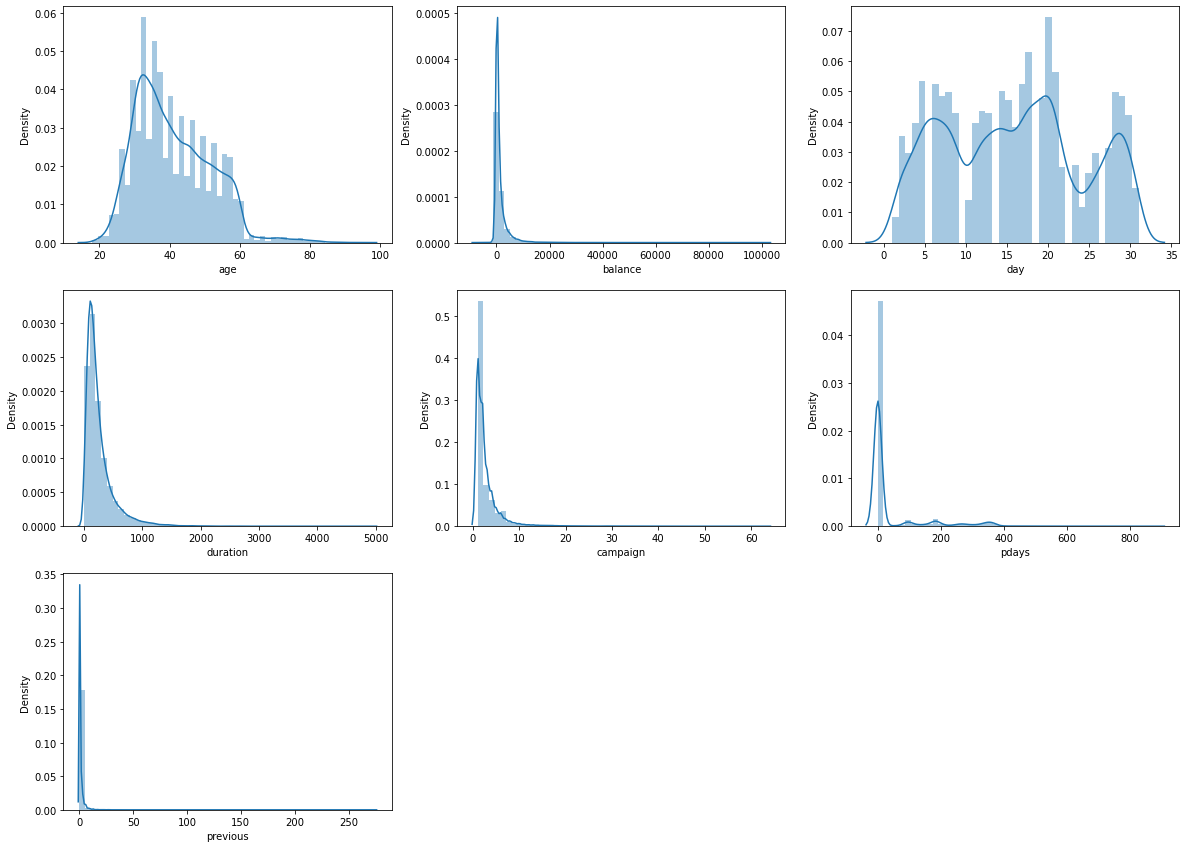

In [11]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in df_train[['age','balance','day','duration','campaign','pdays','previous']]:
    if plotnumber<=8:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df_train[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [ ]:
## We can see skewness in our all column

In [12]:
## Lets use z-score
from scipy import stats

In [13]:
from scipy.stats import zscore

z_score = zscore(df_train[['age','balance','duration','campaign','pdays','previous']])
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis=1)
df_train = df_train[filtering_entry]
df_train.shape

(28124, 17)

In [ ]:
## Let's check the skewness again post treatment:

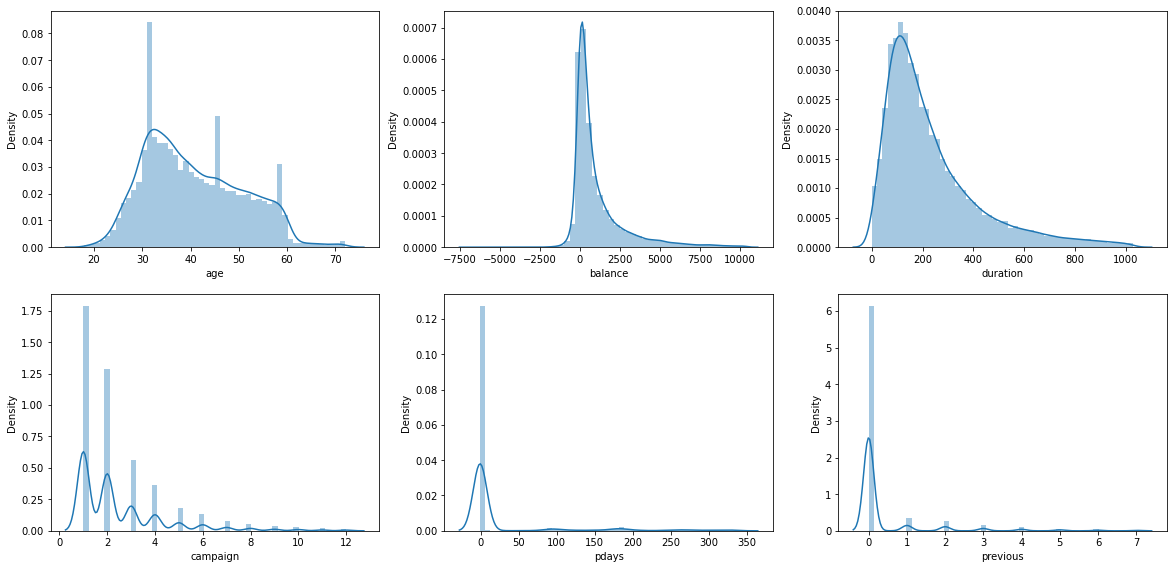

In [14]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in df_train[['age','balance','duration','campaign','pdays','previous']]:
    if plotnumber<=8:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df_train[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [ ]:
## We can see improvement of skewness of coulumns
## Let's now convert our target columns to binary- 0 = not subscribed, 1 = subscribed

In [15]:
subscribe = []
for i in df_train['subscribed']:
    if i == 'yes':
        subscribe.append(1)
    else:
        subscribe.append(0)
        
df_train['subscribed']=subscribe

df_train.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,0
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,0
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,0
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,1
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,0


In [16]:
df_train.tail(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
31640,43,management,single,secondary,no,2968,no,no,unknown,20,jun,30,4,-1,0,unknown,0
31641,37,technician,single,tertiary,no,1309,no,no,unknown,6,jun,442,2,-1,0,unknown,0
31642,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,0
31643,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,1
31644,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,0


In [ ]:
## Now we need to check the heatmap for overfitting model

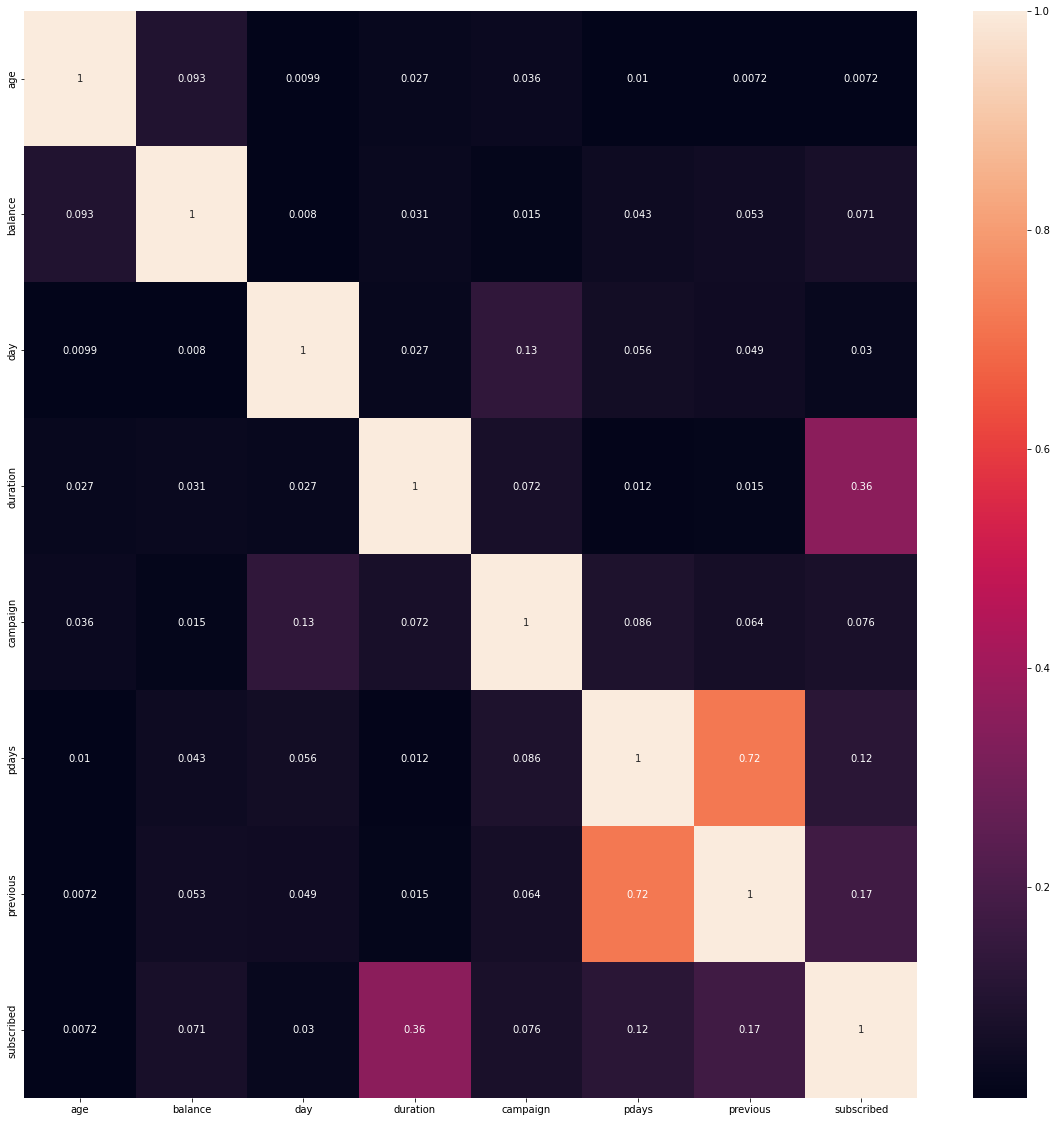

In [17]:
df_train_corr = df_train.corr().abs()

plt.figure(figsize=(20,20))
sns.heatmap(df_train_corr,annot = True)
plt.show()

In [ ]:
## pdays vs previous do show high collinearity
## Let's check scatter plot to confirm this

<function matplotlib.pyplot.show(close=None, block=None)>

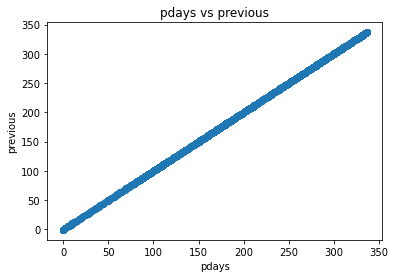

In [18]:
plt.scatter(df_train['pdays'], df_train['pdays'])
plt.xlabel('pdays')
plt.ylabel('previous')
plt.title('pdays vs previous')
plt.show

In [ ]:
## I will delete pdays since is is less correlated to subscribed

In [19]:
df_train.drop(['pdays'], axis = 1, inplace = True)
print(df_train.shape)

df_test.drop(['pdays'], axis = 1, inplace = True)
print(df_test.shape)

(28124, 16)
(13564, 15)


In [ ]:
## Now, let's convert our categorical columns to binary

## I'll use get_dummies for this

In [20]:
print(df_train.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'previous',
       'poutcome', 'subscribed'],
      dtype='object')


In [21]:
categorical_columns = ['job', 'marital', 'education', 'default','housing','loan', 'contact','month','poutcome']

df_train_1 = pd.get_dummies(df_train[categorical_columns],drop_first=True)
df_train_1

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31640,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
31641,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
31642,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
31643,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [22]:
df_train = df_train.join(df_train_1)
df_train

,age,job,marital,education,default,balance,housing,loan,contact,day,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,...,0,0,0,0,1,0,0,0,0,1
1,31,unknown,married,secondary,no,3,no,no,cellular,20,...,1,0,0,0,0,0,0,0,0,1
2,27,services,married,secondary,no,891,yes,no,cellular,18,...,1,0,0,0,0,0,0,0,0,1
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,...,0,1,0,0,0,0,0,0,1,0
4,31,technician,married,secondary,no,119,yes,no,cellular,4,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31640,43,management,single,secondary,no,2968,no,no,unknown,20,...,0,1,0,0,0,0,0,0,0,1
31641,37,technician,single,tertiary,no,1309,no,no,unknown,6,...,0,1,0,0,0,0,0,0,0,1
31642,29,management,single,tertiary,no,0,yes,no,cellular,12,...,0,0,0,1,0,0,0,0,0,1
31643,53,management,divorced,tertiary,no,380,no,yes,cellular,5,...,0,1,0,0,0,0,0,0,0,1


In [23]:
df_train.drop(columns = categorical_columns,axis=1,inplace = True)
df_train

,age,balance,day,duration,campaign,previous,subscribed,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,56,1933,19,44,2,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,31,3,20,91,2,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,27,891,18,240,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,57,3287,22,867,1,3,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,31,119,4,380,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31640,43,2968,20,30,4,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
31641,37,1309,6,442,2,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
31642,29,0,12,116,2,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
31643,53,380,5,438,2,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [24]:
df_test_1 = pd.get_dummies(df_test[categorical_columns],drop_first=True)
df_test_1

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13560,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
13561,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13562,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [25]:
df_test = df_test.join(df_test_1)
df_test

,age,job,marital,education,default,balance,housing,loan,contact,day,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,32,services,married,secondary,no,118,yes,no,cellular,15,...,0,0,0,1,0,0,0,0,0,1
1,78,retired,divorced,primary,no,2787,no,no,telephone,1,...,1,0,0,0,0,0,0,0,0,1
2,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,...,0,0,0,1,0,0,0,0,0,1
3,57,services,single,primary,no,3777,yes,no,telephone,13,...,0,0,0,1,0,0,0,0,0,1
4,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,management,married,tertiary,no,45,no,no,cellular,28,...,0,0,0,0,0,0,0,0,0,1
13560,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,...,0,1,0,0,0,0,0,0,0,1
13561,35,retired,married,primary,no,285,yes,no,cellular,29,...,0,0,0,0,0,0,0,0,0,1
13562,29,admin.,single,secondary,no,464,no,no,cellular,9,...,0,0,0,0,1,0,0,0,1,0


In [26]:
df_test.drop(columns = categorical_columns,axis=1,inplace = True)
df_test

,age,balance,day,duration,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,32,118,15,20,6,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,78,2787,1,372,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,31,144,16,676,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,57,3777,13,65,2,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,45,-705,3,111,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,45,28,148,4,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
13560,54,2281,20,158,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
13561,35,285,29,136,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13562,29,464,9,208,2,3,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
## Lets seprate our target and features variable for training and testing data

In [27]:
x = df_train.drop(columns = ['subscribed'])
y = df_train['subscribed']

In [28]:
x

,age,balance,day,duration,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,56,1933,19,44,2,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,31,3,20,91,2,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,27,891,18,240,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,57,3287,22,867,1,3,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
4,31,119,4,380,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31640,43,2968,20,30,4,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
31641,37,1309,6,442,2,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
31642,29,0,12,116,2,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
31643,53,380,5,438,2,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1


In [29]:
y

0        0
1        0
2        0
3        1
4        0
        ..
31640    0
31641    0
31642    0
31643    1
31644    0
Name: subscribed, Length: 28124, dtype: int64

In [ ]:
## we need to balance our target variable for predictions

In [ ]:
## Check balance using Counter

In [30]:
from collections import Counter
Counter(y)

Counter({0: 25264, 1: 2860})

In [31]:
from imblearn.over_sampling import SMOTE

In [32]:
x_train1,x_test,y_train1,y_test = train_test_split(x,y,test_size=0.2,random_state=69)

In [33]:
Counter(y_train1)

Counter({0: 20181, 1: 2318})

In [34]:
sm = SMOTE(sampling_strategy=0.8)

In [35]:
x_train,y_train = sm.fit_resample(x_train1,y_train1)

print('Classes before fit{} '.format(Counter(y_train1)))
print('Classes after fit{} '.format(Counter(y_train)))

Classes before fitCounter({0: 20181, 1: 2318}) 
Classes after fitCounter({0: 20181, 1: 16144}) 


In [36]:
lr = LogisticRegression()

In [37]:
lr.fit(x_train,y_train)

LogisticRegression()

In [39]:
def metric_score(clf,x_train,x_test,y_train,y_test,train = True):
    if train:
        y_pred = clf.predict(x_train)
        print('\n ======TRAINING RESULT======')
        print(f'Accuracy Score: {accuracy_score(y_train,y_pred)*100:.2f}%')
        
    elif train == False:
        pred = clf.predict(x_test)
        print('\n ======TESTING RESULT======')
        print(f'Accuracy Score: {accuracy_score(y_test,pred)*100:.2f}%')
        print('\n \n TEST CLASSIFICATION REPORT \n', classification_report(y_test,pred,digits =2))

In [40]:
metric_score(lr,x_train,x_test,y_train,y_test,train = True)
metric_score(lr,x_train,x_test,y_train,y_test,train = False)


 ======TRAINING RESULT======
Accuracy Score: 88.67%

 ======TESTING RESULT======
Accuracy Score: 86.95%

 
 TEST CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       0.95      0.90      0.93      5083
           1       0.38      0.55      0.45       542

    accuracy                           0.87      5625
   macro avg       0.66      0.73      0.69      5625
weighted avg       0.89      0.87      0.88      5625



In [ ]:
## We can note our Training Accuracy with Logistic Regression: 89.42% and Testing is: 87.43%
## Its a good score and model is not overfitting

In [41]:
knn = KNeighborsClassifier()
dec = DecisionTreeClassifier()
ran = RandomForestClassifier()
xgb = XGBClassifier()

In [ ]:
## We should now test the data on other models as well to check which model is giving us the best result

In [42]:
#TRAINING THE MODELS
knn.fit(x_train,y_train)
dec.fit(x_train,y_train)
ran.fit(x_train,y_train)
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [43]:
print(lr.score(x_test,y_test))
print(knn.score(x_test,y_test))
print(dec.score(x_test,y_test))
print(ran.score(x_test,y_test))
print(xgb.score(x_test,y_test))

0.8695111111111111
0.7496888888888888
0.8755555555555555
0.9132444444444444
0.9112888888888889


In [ ]:
## we should plot the ROC-AUC curve to check the best fit model

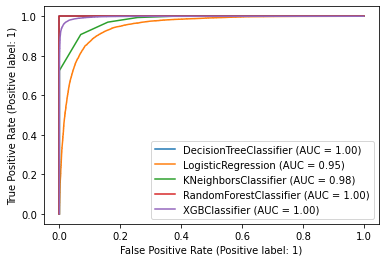

In [44]:
#CHECK ROC AUC CURVE FOR TRAINING

disp = plot_roc_curve(dec,x_train,y_train)
plot_roc_curve(lr,x_train,y_train,ax=disp.ax_)
plot_roc_curve(knn,x_train,y_train,ax=disp.ax_)
plot_roc_curve(ran,x_train,y_train,ax=disp.ax_)
plot_roc_curve(xgb,x_train,y_train,ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

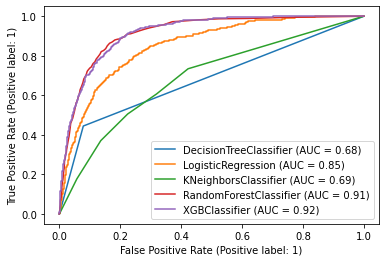

In [45]:
#ROC-AUC CURVE FOR TESTING
disp = plot_roc_curve(dec,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(ran,x_test,y_test,ax=disp.ax_)
plot_roc_curve(xgb,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

In [ ]:
## We can see that our models perform very good with training data
## the testing accuracy for Decision Tree, Random Forest and XGB is low (terrible in case of Decision Tree):
## KNN is not giving decent testing accuracy either and is overfitting.
## Logistic Regression will be my model of choice but XGB and Random Forest can also be considered.

In [ ]:
## Now, let's make predictions for our testing dataset

In [46]:
subscribed_test = lr.predict(df_test)
subscribed_test

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [47]:
df_test['subscribed_test'] = subscribed_test
df_test.head(10)

,age,balance,day,duration,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,subscribed_test
0,32,118,15,20,6,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,78,2787,1,372,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,31,144,16,676,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,57,3777,13,65,2,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,45,-705,3,111,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,32,0,22,455,2,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
6,33,307,5,309,2,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
7,37,341,3,120,2,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
8,36,1381,2,149,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
9,50,181,15,119,4,3,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [48]:
df_test.tail(5)

,age,balance,day,duration,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,subscribed_test
13559,39,45,28,148,4,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
13560,54,2281,20,158,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
13561,35,285,29,136,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
13562,29,464,9,208,2,3,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
13563,29,2,6,339,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
## Now we have made our prediction for testing and training dataset for model training
## Accuracy = 86.95% 